In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results = pd.read_csv('data/tournament_training_results.csv')

def n_hits(game):
    f = open(f'data/self_train_game_logs/game_{game}_log.csv', 'r')
    hits = 0
    for l in f.readlines():
        for s in l.split('/'):
            if '25' in s:
                hits += 1
    return hits


In [3]:
hits = [n_hits(i) for i in range(len(results.index[:724]))]
hits_df = pd.DataFrame(hits,columns=['hits'])
hits_df['group'] = hits_df.index // n
hits_avg = hits_df.groupby('group').median()

plt.plot(range(len(hits_avg)), hits_avg)

NameError: name 'n' is not defined

In [ ]:
plt.plot(range(len(results)), results['plys'])

In [169]:
n = 1000
results = pd.read_csv('data/tournament_training_results.csv')

results2 = results.copy()
results2['group'] = results2.index // n

In [170]:
results2

,game,avg_loss,final_loss,group
0,0,0.067215,1.434710,0
1,1,0.014540,0.583062,0
2,2,0.042239,1.893565,0
3,3,0.076116,1.629536,0
4,4,0.043159,1.778559,0
...,...,...,...,...
148507,148507,0.154707,1.356932,148
148508,148508,0.271763,1.228998,148
148509,148509,0.078083,0.167846,148
148510,148510,0.194973,0.768354,148


In [180]:
grouped_results = results2.groupby('group').median()

In [181]:
grouped_results

,game,avg_loss,final_loss
group,,,
0,499.5,0.072504,1.091591
1,1499.5,0.112589,0.863715
2,2499.5,0.119566,0.749852
3,3499.5,0.128607,0.723920
4,4499.5,0.129175,0.709624
...,...,...,...
144,144499.5,0.144823,0.454406
145,145499.5,0.139446,0.396303
146,146499.5,0.142640,0.448797


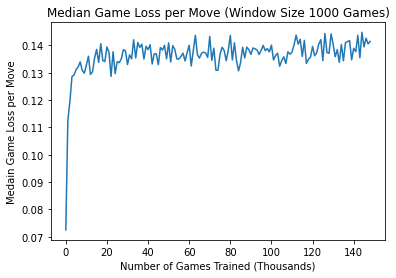

In [182]:
plt.plot(range(len(grouped_results)), grouped_results['avg_loss'])
plt.title('Median Game Loss per Move (Window Size 1000 Games)')
plt.ylabel('Medain Game Loss per Move')
plt.xlabel('Number of Games Trained (Thousands)')
plt.show()

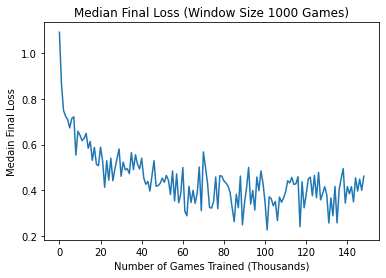

In [183]:
plt.plot(range(len(grouped_results)), grouped_results['final_loss'])
plt.title('Median Final Loss (Window Size 1000 Games)')
plt.ylabel('Medain Final Loss')
plt.xlabel('Number of Games Trained (Thousands)')
plt.show()

In [175]:
np.array([2,1,-1,-2]) @ np.array([0.5,0,0,0.5])

0.0